# Import Libraries 📚

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For data visualization
import statsmodels.api as sm  # For statistical models
from scipy.stats import spearmanr, chi2_contingency, chi2   # For statistical tests

# 📥 Load Unprocessed Dataset

In [2]:
df = pd.read_csv('Unprocessed Data.csv')  # Load CSV into DataFrame
df.head()  # Show first 5 rows

,Res_ID,Age,Occupation,Duration,Activity,Genre,Music_Volume,Help_concentrate,Genre_Distraction,Productivity,Long_Duration,Stress_relief,Critical_productivity
0,U_01,18-25,Student,Rarely,"Writing or creating something, Physical tasks","Instrumental,Rock,Electronic/Dance,Songs with ...",Moderate,Yes,No,With music,No music at all,Yes,I don't listen to music
1,U_02,18-25,Student,Sometimes,Physical tasks,"Instrumental,Electronic/Dance,Nature sounds",Low/Soft,Makes no difference,Maybe,Without music,Music with breaks in between,Yes,Increases productivity
2,U_03,18-25,Student,Often,"Writing or creating something, Physical tasks,...","Instrumental,Songs with lyrics",Low/Soft,Yes,Maybe,With music,Music with breaks in between,Yes,Increases productivity
3,U_04,18-25,Student,Often,"Solving problems,Physical tasks","Instrumental,Songs with lyrics,No preference",Moderate,Yes,Yes,With music,Music with breaks in between,Yes,No difference
4,U_05,18-25,Student,Sometimes,"Writing or creating something, Physical tasks,...","Instrumental,Songs with lyrics,Nature sounds",Moderate,Yes,Yes,With music,Music with breaks in between,sometimes,No difference


# 🧹 Data Cleaning

We will perform the following steps to clean the dataset:
- 🕵️‍♂️ Handle missing values  
- 🏷️ Rename columns (if needed)  
- 🚫 Remove duplicate entries  
- 📅 Sort and organize data  
- 🔍 Prepare the data for analysis  


In [3]:
# Shows DataFrame dimensions (rows, columns)
df.shape

(301, 13)

In [4]:
# Displays column names of the DataFrame
df.columns

Index(['Res_ID', 'Age', 'Occupation', 'Duration', 'Activity', 'Genre',
       'Music_Volume', 'Help_concentrate', 'Genre_Distraction', 'Productivity',
       'Long_Duration', 'Stress_relief', 'Critical_productivity'],
      dtype='object')

In [5]:
df.isnull().sum()  # Count missing values per column

Res_ID                   0
Age                      0
Occupation               0
Duration                 0
Activity                 0
Genre                    0
Music_Volume             0
Help_concentrate         0
Genre_Distraction        0
Productivity             0
Long_Duration            0
Stress_relief            0
Critical_productivity    0
dtype: int64

In [6]:
# Summary of DataFrame: columns, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Res_ID                 301 non-null    object
 1   Age                    301 non-null    object
 2   Occupation             301 non-null    object
 3   Duration               301 non-null    object
 4   Activity               301 non-null    object
 5   Genre                  301 non-null    object
 6   Music_Volume           301 non-null    object
 7   Help_concentrate       301 non-null    object
 8   Genre_Distraction      301 non-null    object
 9   Productivity           301 non-null    object
 10  Long_Duration          301 non-null    object
 11  Stress_relief          301 non-null    object
 12  Critical_productivity  301 non-null    object
dtypes: object(13)
memory usage: 30.7+ KB


In [7]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
df['Age'].value_counts()  # Frequency of each age value

Age
18-25       204
26-35        56
36 above     22
Under 18     19
Name: count, dtype: int64

In [9]:
df['Occupation'].value_counts()  # Frequency of each occupation value

Occupation
Student                    183
Office work                 62
Self-Employed               18
Work from home              10
Creative/Artistic field      7
Teacher                      7
Homemaker                    7
Retired                      5
Unemployed                   2
Name: count, dtype: int64

In [10]:
df['Duration'].value_counts()  # Frequency of each duration value

Duration
Often        95
Always       94
Sometimes    89
Rarely       23
Name: count, dtype: int64

In [11]:
df['Activity'].value_counts()  # Frequency of each activity value

Activity
Physical tasks                                                                      70
Writing or creating something                                                       35
Writing or creating something, Physical tasks                                       34
Writing or creating something,Solving problems,Physical tasks                       31
Solving problems,Physical tasks                                                     24
Reading, Writing or creating something,Solving problems,Physical tasks              13
Solving problems                                                                    12
Writing or creating something, Solving problems                                     10
Reading,Writing or creating something,Physical tasks                                10
Reading                                                                              7
Leisure activity                                                                     7
Travelling                        

In [12]:
df['Genre'].value_counts()  # Frequency of each genre value

Genre
Songs with lyrics                                                                   86
Instrumental,Songs with lyrics                                                      29
Instrumental                                                                        19
No preference                                                                       18
Instrumental,Songs with lyrics,Nature sounds                                        17
Instrumental,Rock,Electronic/Dance,Songs with lyrics,Nature sounds                  15
Nature sounds                                                                       11
Rock,Electronic/Dance,Songs with lyrics                                             11
Instrumental,Rock,Electronic/Dance,Songs with lyrics                                10
Songs with lyrics,Nature sounds                                                     10
Instrumental,Electronic/Dance, Songs with lyrics                                     7
Rock,Songs with lyrics               

In [13]:
df['Music_Volume'].value_counts()  # Frequency of each music volume

Music_Volume
Moderate    163
Low/Soft    102
High         36
Name: count, dtype: int64

In [14]:
df['Help_concentrate'].value_counts()  # Frequency of each help concentrate value

Help_concentrate
Yes                    220
Makes no difference     48
No                      33
Name: count, dtype: int64

In [15]:
df['Genre_Distraction'].value_counts()  # Frequency of each genre distraction value

Genre_Distraction
Yes      170
Maybe     91
No        40
Name: count, dtype: int64

In [16]:
df['Productivity'].value_counts()  # Frequency of each productivity value

Productivity
With music       229
Without music     72
Name: count, dtype: int64

In [17]:
df['Long_Duration'].value_counts()  # Frequency of each long duration

Long_Duration
Music with breaks in between     174
Music playing the entire time     77
No music at all                   50
Name: count, dtype: int64

In [18]:
df['Stress_relief'].value_counts()  # Frequency of each stress relief

Stress_relief
Yes          224
sometimes     60
No            17
Name: count, dtype: int64

In [19]:
df['Critical_productivity'].value_counts()  # Frequency of each critical productivity

Critical_productivity
Increases productivity     157
No difference               69
Decreases productivity      52
I don't listen to music     23
Name: count, dtype: int64

🧹 **Data Cleaning for 'Activity' Column**

🧼 Clean, 🍴 split by commas, 💥 explode into rows, and 📜 check the results for the 'Activity' column.


In [20]:
# 1. Clean the 'Activity' column
df['Activity_clean'] = df['Activity'].astype(str).str.lower().str.strip()

# 2. Split by comma
df['activity_list'] = df['Activity_clean'].str.split(r'\s*,\s*')

# 3. Explode into separate rows
df = df.explode('activity_list').reset_index(drop=True)

# 4. Now print to check
print(df.head())


  Res_ID    Age Occupation   Duration  \
0   U_01  18-25    Student     Rarely   
1   U_01  18-25    Student     Rarely   
2   U_02  18-25    Student  Sometimes   
3   U_03  18-25    Student      Often   
4   U_03  18-25    Student      Often   

                                            Activity  \
0      Writing or creating something, Physical tasks   
1      Writing or creating something, Physical tasks   
2                                     Physical tasks   
3  Writing or creating something, Physical tasks,...   
4  Writing or creating something, Physical tasks,...   

                                               Genre Music_Volume  \
0  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   
1  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   
2        Instrumental,Electronic/Dance,Nature sounds     Low/Soft   
3                     Instrumental,Songs with lyrics     Low/Soft   
4                     Instrumental,Songs with lyrics     Low/Soft   

 

🧹 **Data Cleaning for 'Genre' Column**

🧼 Clean, 🍴 split by commas, 💥 explode into rows, and 📜 check the results for the 'Genre' column. 🎬🍿

In [21]:
# 1. Clean the 'Genre' column
df['Genre_clean'] = df['Genre'].astype(str).str.lower().str.strip()

# 2. Split by comma
df['genre_list'] = df['Genre_clean'].str.split(r'\s*,\s*')

# 3. Explode into separate rows
df = df.explode('genre_list').reset_index(drop=True)

# 4. Now print to check
print(df.head())


  Res_ID    Age Occupation Duration  \
0   U_01  18-25    Student   Rarely   
1   U_01  18-25    Student   Rarely   
2   U_01  18-25    Student   Rarely   
3   U_01  18-25    Student   Rarely   
4   U_01  18-25    Student   Rarely   

                                        Activity  \
0  Writing or creating something, Physical tasks   
1  Writing or creating something, Physical tasks   
2  Writing or creating something, Physical tasks   
3  Writing or creating something, Physical tasks   
4  Writing or creating something, Physical tasks   

                                               Genre Music_Volume  \
0  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   
1  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   
2  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   
3  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   
4  Instrumental,Rock,Electronic/Dance,Songs with ...     Moderate   

  Help_concentrate Genre_Distraction 

In [22]:
df.shape  # DataFrame dimensions (rows, columns)

(1222, 17)

In [23]:
df.isnull().sum()  # Count of missing values in each column

Res_ID                   0
Age                      0
Occupation               0
Duration                 0
Activity                 0
Genre                    0
Music_Volume             0
Help_concentrate         0
Genre_Distraction        0
Productivity             0
Long_Duration            0
Stress_relief            0
Critical_productivity    0
Activity_clean           0
activity_list            0
Genre_clean              0
genre_list               0
dtype: int64

## Data Transformation

**Count unique activities and genres per `Res_ID` and display the first 10 results.**

In [24]:
# Count unique activities and genres per Res_ID
counts = df.groupby('Res_ID').agg({
    'activity_list': pd.Series.nunique,
    'genre_list': pd.Series.nunique
}).reset_index()

# Rename columns for clarity
counts.columns = ['Res_ID', 'Unique_Activity_Count', 'Unique_Genre_Count']

# Show result
counts.head(10)

,Res_ID,Unique_Activity_Count,Unique_Genre_Count
0,U_01,2,5
1,U_02,1,3
2,U_03,3,2
3,U_04,2,3
4,U_05,3,3
5,U_06,1,2
6,U_07,2,1
7,U_08,2,3
8,U_09,2,2
9,U_10,4,5


**Clean the `genre_list`, group by `Res_ID` to get unique genres, apply logic for genre preferences, and generate the final output.**

In [25]:
# Ensure genre_list is clean
df['genre_list'] = df['genre_list'].str.strip().str.lower()

# Group by Res_ID and get unique genres
genre_summary = df.groupby('Res_ID')['genre_list'].unique().reset_index()

# Apply logic: All if >=5 genres or contains 'no preference'
def get_genre_preference(genres):
    if len(genres) >= 5 or 'no preference' in genres:
        return ['All']
    else:
        return genres

# Apply and explode
genre_summary['Genre_Preference'] = genre_summary['genre_list'].apply(get_genre_preference)
genre_summary = genre_summary.explode('Genre_Preference').reset_index(drop=True)

# Final output
genre_summary = genre_summary[['Res_ID', 'Genre_Preference']]


**Drop the `Genre_Preference` column (if it exists) and merge the cleaned `genre_summary` with the original DataFrame.**

In [26]:
df = df.drop(columns=['Genre_Preference'], errors='ignore')  # Drop Genre_Preference column if it exists
df = df.merge(genre_summary, on='Res_ID', how='left')  # Merge genre summary with the original DataFrame

**Drop unnecessary columns (`Activity`, `Genre`, `Activity_clean`, `Genre_clean`, `genre_list`, `Genre_Distraction`) and display the first 5 rows of the DataFrame.**

In [27]:
# Drop unnecessary columns
df = df.drop(columns=[
    'Activity',
    'Genre',
    'Activity_clean',
    'Genre_clean',
    'genre_list',
    'Genre_Distraction'])

df.head()  # Display the first 5 rows of the DataFrame

,Res_ID,Age,Occupation,Duration,Music_Volume,Help_concentrate,Productivity,Long_Duration,Stress_relief,Critical_productivity,activity_list,Genre_Preference
0,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,writing or creating something,All
1,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,writing or creating something,All
2,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,writing or creating something,All
3,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,writing or creating something,All
4,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,writing or creating something,All


In [28]:
df.shape  # Display DataFrame dimensions (rows, columns)

(2658, 12)

In [29]:
df.duplicated().sum()  # Count duplicate rows in the DataFrame

np.int64(1632)

In [30]:
# Remove duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

In [31]:
df.duplicated().sum()  # Count duplicate rows in the DataFrame

np.int64(0)

**Check Unique `Res_ID`s and Total Rows**
- First, we check the number of unique `Res_ID`s in the dataset, which should be 301.

- Then, we check the total number of rows in the DataFrame after any transformations, such as exploding, which is expected to be 1027 or more.


In [32]:
# Check unique Res_IDs (should be 301)
print(df['Res_ID'].nunique())

# Check total rows (likely 1027 or more after exploding)
print(len(df))

301
1026


# 🧹 Processed Dataset

The dataset underwent key preprocessing steps:

1. **Handling Missing Values** ❓: Addressed missing data for integrity.
2. **Removing Duplicates** 🚫: Eliminated redundancy.
3. **Cleaning Text Data** 🧼: Standardized text (e.g., lowercase, whitespace removal).
4. **Handling Multi-Select Columns** 🔄: Split and exploded values for normalization.
5. **Ensuring Consistency** ✅: Checked and dropped unnecessary columns.
6. **Final Adjustments** 🔧: Reset indexes for a clean structure.

The dataset is now ready for deeper analysis! 📊


In [33]:
df.head()  # Display the first 5 rows of the DataFrame

,Res_ID,Age,Occupation,Duration,Music_Volume,Help_concentrate,Productivity,Long_Duration,Stress_relief,Critical_productivity,activity_list,Genre_Preference
0,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,writing or creating something,All
1,U_01,18-25,Student,Rarely,Moderate,Yes,With music,No music at all,Yes,I don't listen to music,physical tasks,All
2,U_02,18-25,Student,Sometimes,Low/Soft,Makes no difference,Without music,Music with breaks in between,Yes,Increases productivity,physical tasks,instrumental
3,U_02,18-25,Student,Sometimes,Low/Soft,Makes no difference,Without music,Music with breaks in between,Yes,Increases productivity,physical tasks,electronic/dance
4,U_02,18-25,Student,Sometimes,Low/Soft,Makes no difference,Without music,Music with breaks in between,Yes,Increases productivity,physical tasks,nature sounds


In [34]:
df.shape  # Display DataFrame dimensions (rows, columns)

(1026, 12)

# **📊 Descriptive Analysis**

Descriptive analysis is the process of summarizing and visualizing data to understand its key characteristics. It provides insights into the **distribution** 🌍, and **relationships** 🔗 within the dataset.

- **Bar Charts** 📊: These charts are used to show the **frequency** 🔄 or count of each category. They help compare how different categories perform in terms of their occurrence, making it easy to spot the **most common** 🌟 or **least common** ❌ categories.

- **Pie Charts** 🥧: These are used to show the **proportion** ⚖️ of each category in relation to the total. They provide a clear view of the **relative size** 📏 of each category within the dataset, helping to visualize the share each category holds in the overall data.

In short, descriptive analysis helps to uncover **patterns** 🔍 and **trends** 📈 within the data, making it easier to **interpret** 📚 and **draw conclusions** 💡.


In [35]:
# Display summary of DataFrame: columns, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Res_ID                 1026 non-null   object
 1   Age                    1026 non-null   object
 2   Occupation             1026 non-null   object
 3   Duration               1026 non-null   object
 4   Music_Volume           1026 non-null   object
 5   Help_concentrate       1026 non-null   object
 6   Productivity           1026 non-null   object
 7   Long_Duration          1026 non-null   object
 8   Stress_relief          1026 non-null   object
 9   Critical_productivity  1026 non-null   object
 10  activity_list          1026 non-null   object
 11  Genre_Preference       1026 non-null   object
dtypes: object(12)
memory usage: 96.3+ KB


### Age Distribution
The following chart shows the age distribution of respondents, providing a clear view of the different age groups represented.

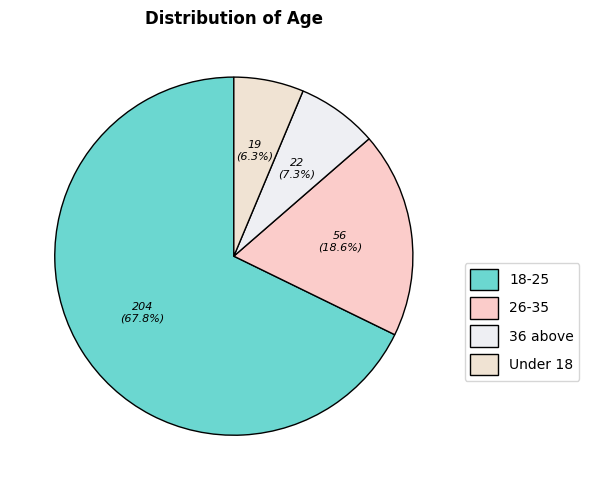

In [36]:
# Group by Age and count unique Res_IDs
age_counts = df.groupby('Age')['Res_ID'].nunique().sort_values(ascending=False)
total = age_counts.sum()

# Create pie chart for Age distribution
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(age_counts, colors=['#6BD7D0', '#FBCCCA', '#EEEFF3', '#F0E3D3'],
                                   autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
                                   startangle=90, textprops={'color': 'black', 'fontsize': 8, 'style': 'italic'})
for w in wedges: w.set_edgecolor('black')
plt.legend(age_counts.index, bbox_to_anchor=(1, 0.5), handleheight=2)
plt.title('Distribution of Age', weight='bold')
plt.tight_layout()
plt.show()


### Occupation
The following chart displays the number of unique respondents by occupation, showing which professions were most represented.

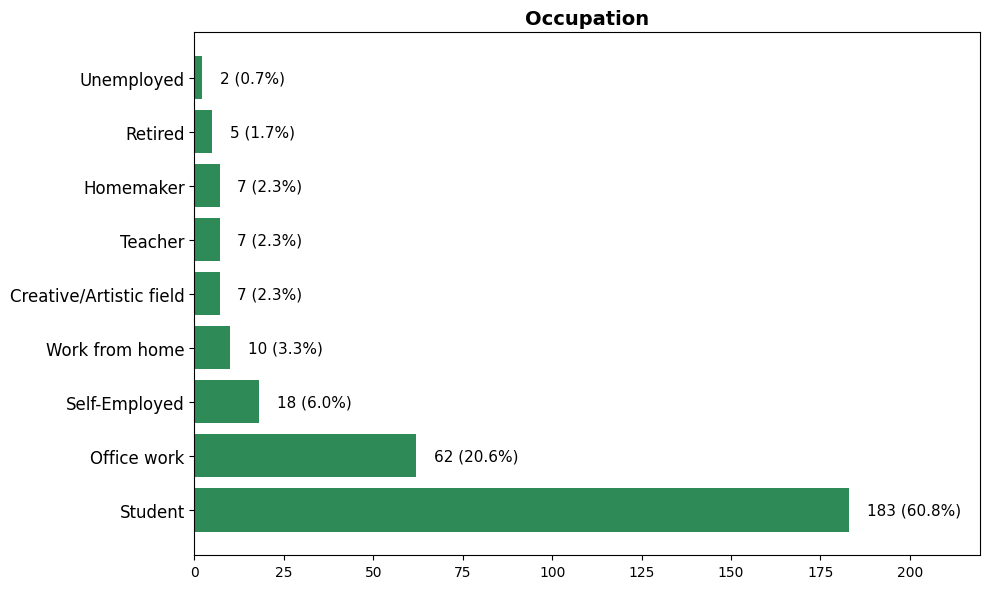

In [37]:
# Count the number of responses for each occupation
Occupation_counts = df.groupby('Occupation')['Res_ID'].nunique().sort_values(ascending=False)
total = Occupation_counts.sum()  # Total number of responses

plt.figure(figsize=(10, 6))
plt.barh(Occupation_counts.index, Occupation_counts, color='seagreen')  # Use a green shade for bars

# Extend x-axis to make room for labels on the right
plt.xlim(0, Occupation_counts.max() * 1.2)

# Add value + percentage labels next to each bar
for i, v in enumerate(Occupation_counts):
    label = f'{v} ({v/total:.1%})'  # Example: "35 (23.3%)"
    plt.text(v + 5, i, label, va='center', ha='left', fontsize=11)

# Set chart title and axis labels
plt.title("Occupation", fontsize=14, weight='bold')
plt.xlabel("")  # You can remove this line if you prefer no x-axis label
plt.yticks(fontsize=12)
plt.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the chart
plt.show()

This pie chart shows the distribution of unique responses based on the duration. It helps identify which duration categories were most common among the respondents

### Listening Habits Distribution
The following chart displays how frequently respondents listen to music while doing activities. It helps visualize the distribution of different listening habits among the surveyed individuals.

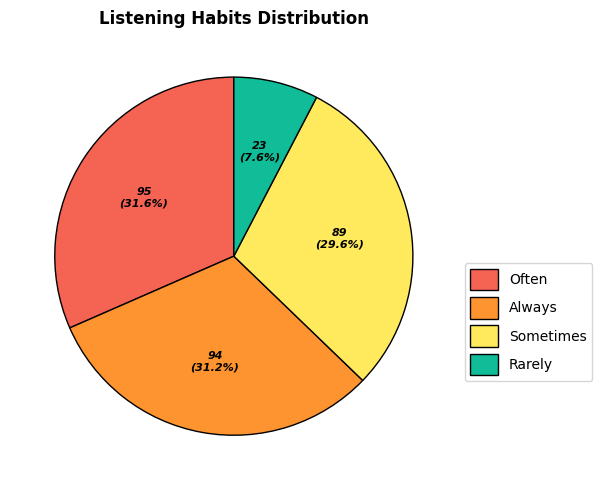

In [38]:
# Group by Duration and count unique Res_IDs
value_counts = df.groupby('Duration')['Res_ID'].nunique().sort_values(ascending=False)
total = value_counts.sum()

# Create pie chart for Listening Habits distribution
plt.figure(figsize=(7, 5))
wedges, texts, autotexts = plt.pie(value_counts, colors=['#F56353', '#FE9430', '#FFE95C', '#11BD98'],
                                   autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
                                   startangle=90, textprops={'color': 'black', 'fontsize': 8, 'style': 'italic', 'weight': 'bold'})
for w in wedges: w.set_edgecolor('black')
plt.legend(value_counts.index, bbox_to_anchor=(1, 0.5), handleheight=2)
plt.title('Listening Habits Distribution', weight='bold')
plt.tight_layout()
plt.show()


### Music Volume Preference
The following chart reveals how loud respondents like their music, showcasing the distribution of volume preferences. It helps understand how people enjoy music at different loudness levels.

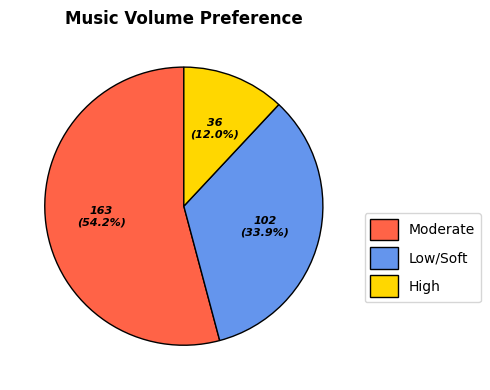

In [39]:
# Group by Music_Volume and count unique Res_IDs
value_counts = df.groupby('Music_Volume')['Res_ID'].nunique().sort_values(ascending=False)
total = value_counts.sum()

# Create pie chart for Music Volume Preference distribution
plt.figure(figsize=(6, 4))
wedges, texts, autotexts = plt.pie(value_counts, colors=['tomato', 'cornflowerblue', 'gold'],
                                   autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
                                   startangle=90, textprops={'color': 'black', 'fontsize': 8, 'style': 'italic', 'weight': 'bold'})
for w in wedges: w.set_edgecolor('black')
plt.legend(value_counts.index, bbox_to_anchor=(1, 0.5), handleheight=2)
plt.title('Music Volume Preference', weight='bold')
plt.tight_layout()
plt.show()


### Concentration with Music
The following chart shows how music affects people's concentration, illustrating the distribution of responses on whether music helps or hinders focus.

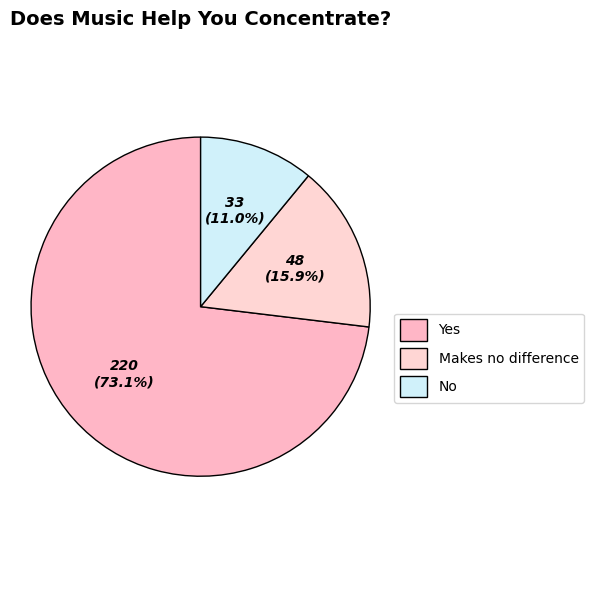

In [40]:
# Group by Help_concentrate and count unique Res_IDs
value_counts = df.groupby('Help_concentrate')['Res_ID'].nunique().sort_values(ascending=False)
total = value_counts.sum()

# Create pie chart for "Does Music Help You Concentrate?"
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(value_counts, colors=['#FFB6C6', '#FFD6D4', '#D0F1FA'],
                                   autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
                                   startangle=90, textprops={'color': 'black', 'fontsize': 10, 'style': 'italic', 'weight': 'bold'})
for w in wedges: w.set_edgecolor('black')

plt.legend(value_counts.index, bbox_to_anchor=(1, 0.5), handleheight=2)
plt.title("Does Music Help You Concentrate?", fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Productivity With or Without Music?
The following chart shows when people feel most productive, giving insight into the times or conditions that enhance focus and efficiency.

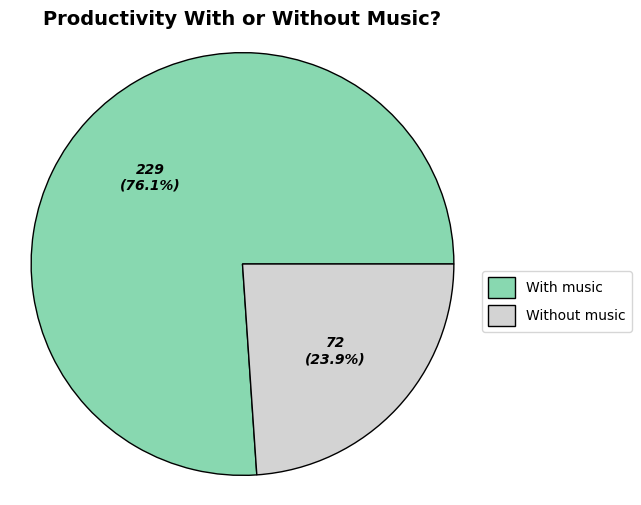

In [41]:
# Group by Productivity and count unique Res_IDs
pro_counts = df.groupby('Productivity')['Res_ID'].nunique().sort_values(ascending=False)
total = pro_counts.sum()

# Create pie chart for "Productivity With or Without Music?"
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(pro_counts, colors=['#88d8b0', 'lightgrey'],
                                   autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
                                   textprops={'color': 'black', 'fontsize': 10, 'style': 'italic', 'weight': 'bold'})
for w in wedges: w.set_edgecolor('black')
plt.title("Productivity With or Without Music?", fontsize=14, weight='bold')
plt.legend(pro_counts.index, bbox_to_anchor=(1, 0.5), handleheight=2)
plt.axis('equal')
plt.show()


### How to Use Music to Stay Focused Longer

The following chart shows people’s preferences when focusing for a long duration. It highlights whether they prefer music playing the entire time, music with breaks, or no music at all during extended periods of concentration.

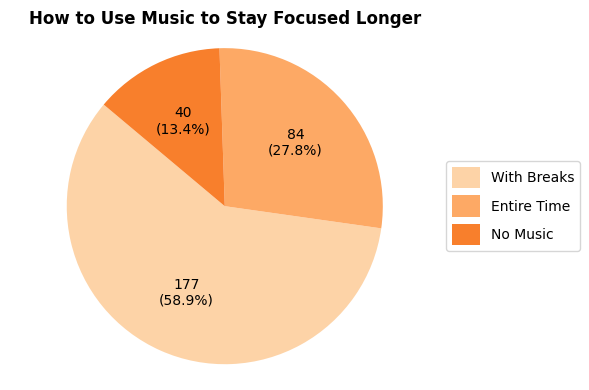

In [42]:
# Step 1: Count unique Res_IDs per Long_Duration category
duration_counts = df.groupby('Long_Duration')['Res_ID'].nunique().sort_values(ascending=False)
total = duration_counts.sum()

# Step 2: Re-fetch value counts (if needed for plotting proportions)
duration_counts = df['Long_Duration'].value_counts()

# Step 3: Clean up category names
duration_counts.index = duration_counts.index.str.replace('Music with breaks in between', 'With Breaks')
duration_counts.index = duration_counts.index.str.replace('Music playing the entire time', 'Entire Time')
duration_counts.index = duration_counts.index.str.replace('No music at all', 'No Music')

# Step 4: Plot pie chart
plt.figure(figsize=(6, 4))
wedges, _, _ = plt.pie(
    duration_counts,
    autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
    startangle=140,
    colors=plt.cm.Oranges(range(60, 60 + len(duration_counts)*40, 40)))
# Step 5: Add legend
plt.legend(
    wedges,
    duration_counts.index,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    handleheight=2)
# Step 6: Final touches
plt.title('How to Use Music to Stay Focused Longer', weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

### Stress Reduction Through Music
This chart shows whether people listen to music to reduce stress, providing insights into the relationship between music and stress relief.

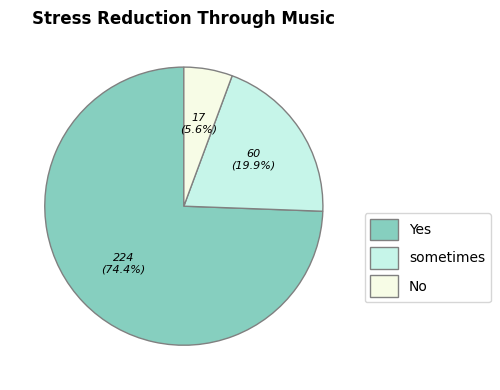

In [43]:
# Count the number of responses for each category in 'Stress_relief' column
stress_counts = df.groupby('Stress_relief')['Res_ID'].nunique().sort_values(ascending=False)
total = stress_counts.sum()

plt.figure(figsize=(6, 4))
plt.pie(
    stress_counts,
    colors=['#86CFBF', '#C6F5E9', '#F7FCE6'],
    autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
    startangle=90,
    textprops={
        'color': 'black',
        'fontsize': 8,
        'style': 'italic'
    }
)
# Add black border to wedges
for w in plt.gca().patches:
    w.set_edgecolor('grey')

plt.legend(stress_counts.index, bbox_to_anchor=(1, 0.5),handleheight=2)
plt.title('Stress Reduction Through Music', weight='bold')
plt.tight_layout()
plt.show()

### Music's Role in Critical Tasks
This chart shows how music affects productivity during critical tasks, highlighting whether it increases, has no effect, or decreases productivity, along with those who prefer not to listen to music.

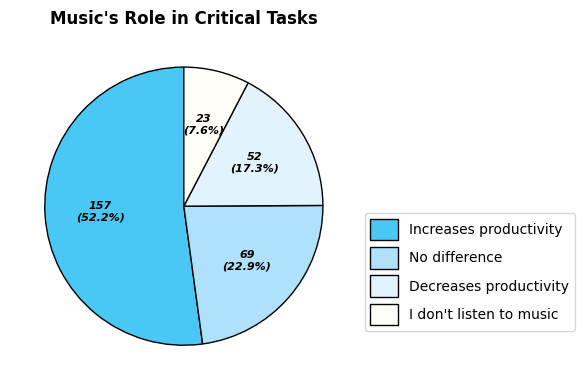

In [44]:
critical_counts = df.groupby('Critical_productivity')['Res_ID'].nunique().sort_values(ascending=False)
total = critical_counts.sum()

plt.figure(figsize=(6, 4))

# Show percentage on top and count below it
plt.pie(
    critical_counts,
    colors=['#49C8F5','#AFE1FC', '#E2F3FD', '#FFFEF9'],
    autopct=lambda pct: f"{int(round(pct * total / 100.0))}\n({pct:.1f}%)",
    startangle=90,
    textprops={'color': 'black', 'fontsize': 8, 'style': 'italic', 'weight':'bold'}
)

for w in plt.gca().patches:
    w.set_edgecolor('black')

plt.legend(critical_counts.index, bbox_to_anchor=(1, 0.5), handleheight=2)
plt.title("Music's Role in Critical Tasks", weight='bold')
plt.tight_layout()
plt.show()

### Activity Preferences
This chart shows the different activities people engage in while listening to music, offering insights into how music complements various tasks.

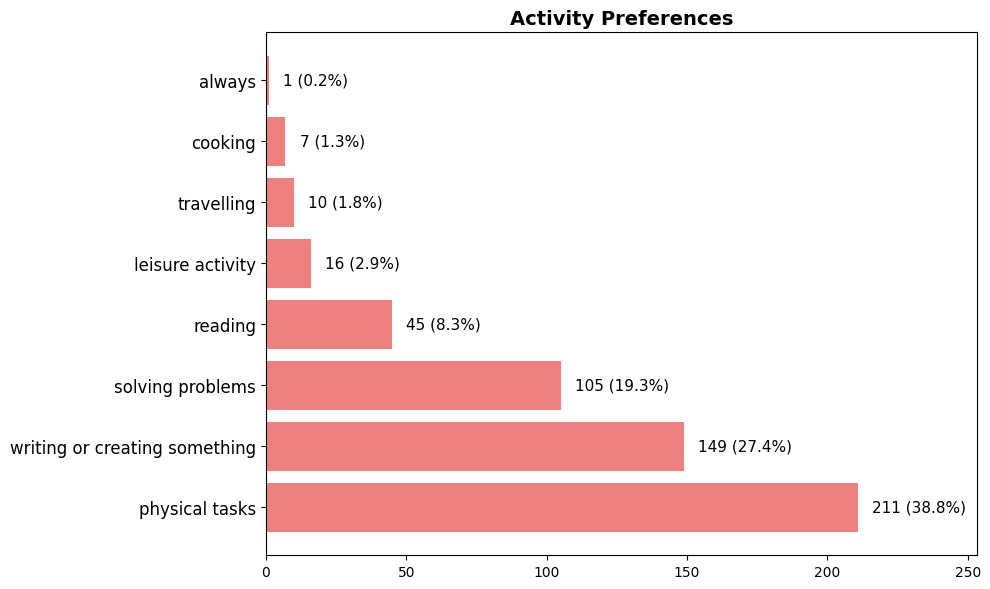

In [45]:
activity_counts = df.groupby('activity_list')['Res_ID'].nunique().sort_values(ascending=False)
total = activity_counts.sum()

plt.figure(figsize=(10, 6))
plt.barh(activity_counts.index, activity_counts, color='lightcoral')  # Light red color

max_count = activity_counts.max()
plt.xlim(0, max_count * 1.2)  # Adds whitespace on the right for text

# Add labels to each bar showing the count and percentage
for i, v in enumerate(activity_counts):
    label = f'{v} ({v/total:.1%})'  # Format as "count (percent)"
    plt.text(v + 5, i, label, va='center', ha='left', fontsize=11)  # Position text right of the bar

plt.title("Activity Preferences", fontsize=14, weight = 'bold')

# Remove x-axis label
plt.xlabel("")

# Set font size of y-axis (activity names)
plt.yticks(fontsize=12)

# Adjust layout so everything fits nicely
plt.tight_layout()
plt.show()

### Genre Preferences
This chart shows the types of music people enjoy the most, highlighting the most popular genres among respondents.

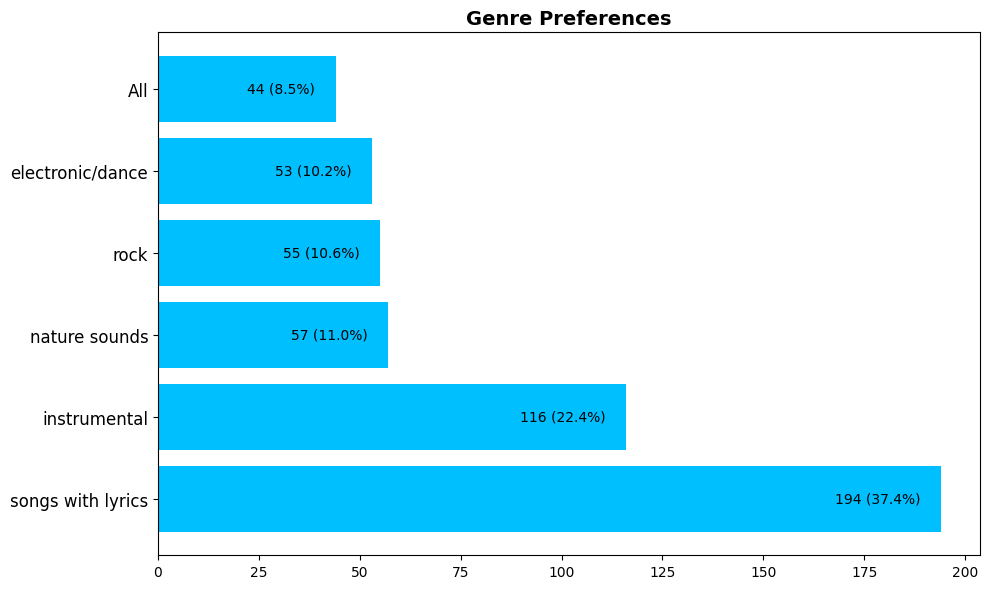

In [46]:
Genre_pre_counts = df.groupby('Genre_Preference')['Res_ID'].nunique().sort_values(ascending=False)

# Calculate the total number of responses
total = Genre_pre_counts.sum()

plt.figure(figsize=(10, 6))

# Create a horizontal bar plot (barh)
bars = plt.barh(Genre_pre_counts.index, Genre_pre_counts, color='#00bfff')  # Light blue color

# Add count and percentage labels inside each bar
for i, (genre, Genre_pre_counts) in enumerate(Genre_pre_counts.items()):
    pct = Genre_pre_counts / total  # Calculate percentage
    label = f'{Genre_pre_counts} ({pct:.1%})'  # Create label text
    text_color = 'black'  # Set text color

    # Position the label near the end of each bar (adjusted by -5 for padding)
    plt.text(Genre_pre_counts - 5, i, label, va='center', ha='right', fontsize=10, color=text_color)


plt.title("Genre Preferences", fontsize=14, weight= 'bold')

# Remove x-axis label
plt.xlabel("")

plt.yticks(fontsize=12)

# Automatically adjust layout to fit all elements
plt.tight_layout()
plt.show()

------------------------------------------------------------------------

# **🔗📈 CORRELATION ANALYSIS**



## **🔢🧠 Encoded Data**

This step involves converting categorical variables into numerical form to make the data suitable for analysis and machine learning models. 📊🤖


## **📏 ρ Value (Rho) & 📉 p-value – Correlation Guide**

### 🔍 Strength of Correlation (ρ):
| ρ Range              | 📊 Strength               |
|----------------------|---------------------------|
| 0.00 to ±0.19         | ⚪ Very Weak / No Correlation |
| ±0.20 to ±0.39        | 🟡 Weak                    |
| ±0.40 to ±0.59        | 🟠 Moderate                |
| ±0.60 to ±0.79        | 🔵 Strong                  |
| ±0.80 to ±1.00        | 🔴 Very Strong             |

---

- **ρ (rho)** ➡️ tells you the **direction ↕️** and **strength 💪** of the relationship between variables.  
- **p-value** 📉 tells you whether the correlation is **statistically significant** ✅ (usually **p < 0.05** is considered significant).  
- A **low p-value** means you can **trust** the correlation, while a **high p-value** suggests it might be due to chance. 🎯


In [47]:
# Age range in increasing order
age_map = {'Under 18': 1,'18-25': 2,'26-35': 3,'36 above': 4}

# Duration ranking from least to most
duration_map = {'Rarely': 1,'Sometimes': 2,'Often': 3,'Always': 4}

# Music_Volume ranking from low to high
Music_Volume_map = {'Low/Soft': 1,'Moderate': 2,'High': 3}

# Help_concentrate ordinal map
help_map = {'No': -1,'Makes no difference': 0,'Yes': 1}

# Long_Duration ordinal map
long_duration_map = {'No music at all': -1,
                     'Music with breaks in between': 0,
                     'Music playing the entire time': 1}

# Stress_relief binary map
stress_map = {'No': -1,'sometimes': 0,'Yes': 1}

# Critical productivity ranking
critical_prod_map = {'Decreases productivity' : -1,
                     "I don't listen to music": -2 ,
                     'No difference' : 0,
                     'Increases productivity': 1}

# Binary mapping for Productivity
productivity_map = {'Without music': -1,'With music': 1}

# Apply mappings
df_encoded = df.copy()
df_encoded['Age'] = df_encoded['Age'].map(age_map)
df_encoded['Duration'] = df_encoded['Duration'].map(duration_map)
df_encoded['Music_Volume'] = df_encoded['Music_Volume'].map(Music_Volume_map)
df_encoded['Help_concentrate'] = df_encoded['Help_concentrate'].map(help_map)
df_encoded['Long_Duration'] = df_encoded['Long_Duration'].map(long_duration_map)
df_encoded['Stress_relief'] = df_encoded['Stress_relief'].map(stress_map)
df_encoded['Critical_productivity'] = df_encoded['Critical_productivity'].map(critical_prod_map)
df_encoded['Productivity'] = df_encoded['Productivity'].map(productivity_map)

df_encoded.head()

,Res_ID,Age,Occupation,Duration,Music_Volume,Help_concentrate,Productivity,Long_Duration,Stress_relief,Critical_productivity,activity_list,Genre_Preference
0,U_01,2,Student,1,2,1,1,-1,1,-2,writing or creating something,All
1,U_01,2,Student,1,2,1,1,-1,1,-2,physical tasks,All
2,U_02,2,Student,2,1,0,-1,0,1,1,physical tasks,instrumental
3,U_02,2,Student,2,1,0,-1,0,1,1,physical tasks,electronic/dance
4,U_02,2,Student,2,1,0,-1,0,1,1,physical tasks,nature sounds


## 📊 Spearman’s Rank Correlation Coefficient (𝜌)

Spearman's rank correlation coefficient is a **non-parametric measure** of the strength and direction of association between two ranked variables. It is used to identify **monotonic relationships**, where variables move in the same or opposite direction, but not necessarily at a constant rate.

---

#### ✅ When to Use Spearman’s Correlation

- When the data is **ordinal** or **not normally distributed**
- When the relationship between variables is **monotonic** (not necessarily linear)
- Useful when **outliers** may distort Pearson correlation

---

#### 🧮 Mathematical Formula

If there are no ties in the data:

### Spearman's Rank Correlation Coefficient

Here’s the formula in markdown without using LaTeX code:

---

**Spearman's Rank Correlation Formula:**

ρ = 1 - (6 * Σ(dᵢ)²) / (n * (n² - 1))

Where:
- **ρ**: Spearman's rank correlation coefficient
- **dᵢ**: Difference between the ranks of each observation
- **n**: Number of observations

---

Let me know if you need further clarification!

If there are **ties**, average ranks are assigned, and the same formula still applies.

---

#### ⚙️ How It Works Internally

1. Each variable is **converted to ranks** (handling ties by assigning average ranks).
2. The **differences in ranks** are calculated for each observation.
3. The Spearman formula is then applied using those rank differences.

In Python, we can use `scipy.stats.spearmanr()` which:

- Automatically handles ties
- Returns both the Spearman 𝜌 and the p-value

---

#### 🧠 Monotonic Relationship Reminder

A relationship is **monotonic** if one variable consistently increases (or decreases) as the other increases — but the change doesn't need to be linear.

Example:  
If \( X = [1, 2, 3, 4] \) and \( Y = [10, 20, 25, 40] \), then \( Y \) is increasing as \( X \) increases — this is monotonic.

### 📏📊 **Correlation Analysis Utilities**

This block includes two key functions:
- 🧪 **Statistical Significance Check**: Evaluates the p-value to determine if the correlation is statistically significant.
- 📈 **Strength & Direction Interpreter**: Analyzes Spearman’s ρ (rho) to describe how strong and in which direction variables are related.

Useful for making informed, data-driven insights from encoded survey responses.

In [48]:
# Function for finding the Statistical significance
def p_value(p_val,rho_value):
  print(f"Spearman’s ρ (rho): {rho_value:.2f}")
  print(f"P-value: {p_val:.4f}")
  if p_val < 0.05:
    print("✅ The correlation is statistically significant (p < 0.05)")
  else:
    print("❌ The correlation is NOT statistically significant (p ≥ 0.05)")

  # --- Technical Note for p ≈ 0 ---
  if pval < 0.0001:
      print("\n" + "-"*40)
      print("TECHNICAL NOTE: p-value approximation".center(40))
      print("-"*40)
      print(
    f"""1. **Interpretation**
      - The reported p-value ({pval:.4f}) indicates the true value is smaller than 0.0001.
      - This provides strong evidence against the null hypothesis.

    2. **Common Causes**
      - Large sample sizes (301 observations)
      - Highly consistent monotonic relationships

    3. **Recommendations**
      - Verify effect size (ρ = {rho:.2f}) for practical significance
      - Inspect the scatterplot for nonlinear patterns
      - Consider subgroup analyses if categorical variables exist"""
        )

# Function for find the Strength & direction (using original rho)
def interpret_correlation(rho_value):
  abs_rho = abs(rho_value)
  if abs_rho < 0.2:
      strength = "very weak"
  elif abs_rho < 0.4:
      strength = "weak"
  elif abs_rho < 0.6:
      strength = "moderate"
  elif abs_rho < 0.8:
      strength = "strong"
  else:
      strength = "very strong"
  direction = "positive" if rho_value > 0 else "negative"
  return strength, direction

## **1. 🎧📊 Is there a relationship between Age and Music Listening Volume?**

➡️ We’re exploring if there's a correlation between **Age** 👵👦 (numerical/ordinal) and **Music Volume** 🔊 (numeric/ordinal).  
This helps us understand whether listening volume preferences vary across different age groups. 📈🎶

→ (age as a number or ordinal + Music_Volume as numeric/ordinal) [age + Music_Volume]

In [49]:
# STEP 1: Clean the data
longsession_data = df_encoded[['Age', 'Music_Volume']].dropna()

# STEP 2: Calculate Spearman's correlation
rho, pval = spearmanr(longsession_data['Age'], longsession_data['Music_Volume'])

# Step 3: Output correlation and p-value
p_value(pval,rho)

# STEP 4: Interpret correlation strength
strength, direction = interpret_correlation(rho)
print(f"📌 Interpretation: There is a {strength} {direction} correlation between Age and Music Volumn.")


Spearman’s ρ (rho): -0.02
P-value: 0.5168
❌ The correlation is NOT statistically significant (p ≥ 0.05)
📌 Interpretation: There is a very weak negative correlation between Age and Music Volumn.


**Correlation Between Age and Music Listening Music_Volume**  
A **Spearman’s rank correlation** 🧮 was conducted to evaluate the relationship between participants' **age** 👵👦 and how frequently they **listen to music** 🎶. The analysis yielded a correlation coefficient of **ρ = -0.02** 📉 with a **p-value of 0.5168** 🧐.  
This indicates a **very weak negative correlation** ➖ that is **not statistically significant** 🚫 (p > 0.05).  
Therefore, we cannot conclude that there is a meaningful relationship 🔗 between age and music listening **Music_Volume** in this dataset. 📊


## **2. 🎵🧠 Is there a correlation between how helpful music is for concentration and self-reported productivity?**

➡️ We’re checking if there's a correlation between how **helpful music is for concentration** 🎧🧘 and **self-reported productivity** 📈💼.  
Both are measured on a **Likert scale**, making them ideal for analyzing relationships. 🔗✅

→ (Both on Likert scale = perfect for correlation) [help_concentrate + productivity]

In [50]:
# STEP 1: Clean the data
longsession_data = df_encoded[['Help_concentrate', 'Productivity']].dropna()

# STEP 2: Calculate Spearman's correlation
rho, pval = spearmanr(longsession_data['Help_concentrate'], longsession_data['Productivity'])

# Step 3: Output correlation and p-value
p_value(pval,rho)

# STEP 4: Interpret correlation strength
strength, direction = interpret_correlation(rho)
print(f"📌 Interpretation: There is a {strength} {direction} correlation between Help concentrate and productivity.")

Spearman’s ρ (rho): 0.56
P-value: 0.0000
✅ The correlation is statistically significant (p < 0.05)

----------------------------------------
 TECHNICAL NOTE: p-value approximation  
----------------------------------------
1. **Interpretation**
      - The reported p-value (0.0000) indicates the true value is smaller than 0.0001.
      - This provides strong evidence against the null hypothesis.

    2. **Common Causes**
      - Large sample sizes (301 observations)
      - Highly consistent monotonic relationships

    3. **Recommendations**
      - Verify effect size (ρ = 0.56) for practical significance
      - Inspect the scatterplot for nonlinear patterns
      - Consider subgroup analyses if categorical variables exist
📌 Interpretation: There is a moderate positive correlation between Help concentrate and productivity.


**Correlation Between Helpfulness of Music for Concentration and Productivity**  
A **Spearman’s rank-order correlation** 🧮 was conducted to examine the relationship between how helpful individuals perceive music 🎶 to be for **concentration** 🧠 and their self-reported **productivity** 📈. The analysis revealed a **moderate positive correlation**, **ρ = 0.56** ➕, with a **p-value of < 0.0001** 🔍, indicating a **statistically significant association** ✅.  
This suggests that individuals who find music helpful for concentration 🎧 are more likely to report **higher productivity** 💼 when listening to music. 📊


## **3. 🎶😌 Is there a correlation between using music to reduce stress and feeling more productive?**

➡️ We're exploring the correlation between **using music for stress relief** 🧘‍♀️🎧 and **feeling more productive** 📈💼.  
If both are measured numerically or on a **Likert scale**, we can assess their relationship. 🔗📊

→ (If both are scored numerically or on Likert scale) [stress relief + productivity]

In [51]:
# Step 1: Filter and drop NaN
stress_prod_data = df_encoded[['Stress_relief', 'Productivity']].dropna()

# Step 2: Spearman correlation
rho, pval = spearmanr(stress_prod_data['Stress_relief'], stress_prod_data['Productivity'])

# Step 3: Output correlation and p-value
p_value(pval,rho)

# STEP 4: Interpret correlation strength
strength, direction = interpret_correlation(rho)

print(f"📌 Interpretation: There is a {strength} {direction} correlation between stress relief through music and productivity.")



Spearman’s ρ (rho): 0.20
P-value: 0.0000
✅ The correlation is statistically significant (p < 0.05)

----------------------------------------
 TECHNICAL NOTE: p-value approximation  
----------------------------------------
1. **Interpretation**
      - The reported p-value (0.0000) indicates the true value is smaller than 0.0001.
      - This provides strong evidence against the null hypothesis.

    2. **Common Causes**
      - Large sample sizes (301 observations)
      - Highly consistent monotonic relationships

    3. **Recommendations**
      - Verify effect size (ρ = 0.20) for practical significance
      - Inspect the scatterplot for nonlinear patterns
      - Consider subgroup analyses if categorical variables exist
📌 Interpretation: There is a weak positive correlation between stress relief through music and productivity.


**Correlation Between Using Music for Stress Relief and Productivity**  
A **Spearman’s rank-order correlation** 🧮 was conducted to examine the relationship between using music 🎶 to relieve **stress** 😌 and perceived **productivity** 📈. The results revealed a **weak positive correlation**, **ρ = 0.20** ➕, with a **p-value of < 0.0001** 🔍, indicating that the relationship is **statistically significant** ✅.  
This suggests that individuals who use music as a means to reduce stress 🎧😌 may also tend to report slightly higher **productivity levels** 💼.


## **4. 🔊🧠 Is there a relationship between preferred volume level and perceived helpfulness of music for concentration?**

➡️ We're examining if the **preferred music volume** 🔊 and the **perceived helpfulness of music for concentration** 🧠🎵 are related.  
With **volume** 🔈 as an **ordinal scale** and **helpfulness** 🎯 on a **Likert scale**, this analysis explores how volume preferences might impact focus and productivity. 🔍📚📊

→ (Volume = ordinal scale, Helpfulness = Likert) [Music_Volume + help_concentrate]

In [52]:
# Step 1: Filter relevant columns and drop NaNs
volume_help_data = df_encoded[['Music_Volume', 'Help_concentrate']].dropna()

# Step 2: Run Spearman correlation
rho, pval = spearmanr(volume_help_data['Music_Volume'], volume_help_data['Help_concentrate'])

# Step 3: Output correlation and p-value
p_value(pval,rho)

# STEP 4: Interpret correlation strength
strength, direction = interpret_correlation(rho)

print(f"📌 Interpretation: There is a {strength} {direction} correlation between volume level and help concentration.")

Spearman’s ρ (rho): -0.08
P-value: 0.0122
✅ The correlation is statistically significant (p < 0.05)
📌 Interpretation: There is a very weak negative correlation between volume level and help concentration.


**Correlation Between Preferred Volume Level and Perceived Helpfulness of Music for Concentration**  
A **Spearman’s rank-order correlation** 🧮 was performed to assess the relationship between individuals’ **preferred volume level** 🔊 and how helpful they find **music** 🎶 for **concentration** 🧠. The analysis yielded a **very weak negative correlation**, **ρ = -0.08** ➖, with a **p-value of 0.0122** 🔍, indicating the result is **statistically significant** ✅.  
Although significant, the weak negative relationship suggests that as **volume preference** 🔈 slightly increases, the perceived **helpfulness of music for concentration** 🎧 may slightly decrease — but the effect is **minimal**. 📉


## **5. 🎶⏱️ Does music used in long sessions correlate with self-rated focus levels?**

➡️ We're analyzing whether the **genre or style of music** 🎧 used during **long listening sessions** ⏳ is correlated with **self-rated focus levels** 🎯🧠.  
By encoding long-duration music types and comparing them with **productivity ratings** 📈, we can uncover potential patterns. 🔗📊

→ (Encode long-duration genre/style, correlate with productivity) [Long duration + Productivity]

In [53]:
# STEP 1: Clean the data
longsession_data = df_encoded[['Long_Duration', 'Productivity']].dropna()

# STEP 2: Calculate Spearman's correlation
rho, pval = spearmanr(longsession_data['Long_Duration'], longsession_data['Productivity'])

# Step 3: Output correlation and p-value
p_value(pval,rho)

# STEP 4: Interpret correlation strength
strength, direction = interpret_correlation(rho)

print(f"📌 Interpretation: There is a {strength} {direction} correlation between long duration and productivity.")

Spearman’s ρ (rho): 0.43
P-value: 0.0000
✅ The correlation is statistically significant (p < 0.05)

----------------------------------------
 TECHNICAL NOTE: p-value approximation  
----------------------------------------
1. **Interpretation**
      - The reported p-value (0.0000) indicates the true value is smaller than 0.0001.
      - This provides strong evidence against the null hypothesis.

    2. **Common Causes**
      - Large sample sizes (301 observations)
      - Highly consistent monotonic relationships

    3. **Recommendations**
      - Verify effect size (ρ = 0.43) for practical significance
      - Inspect the scatterplot for nonlinear patterns
      - Consider subgroup analyses if categorical variables exist
📌 Interpretation: There is a moderate positive correlation between long duration and productivity.


**Correlation Between Long-Session Music Style and Self-Rated Productivity**  
A **Spearman’s rank-order correlation** 🧮 was conducted to explore the relationship between the type of **music** 🎶 used during **long sessions** ⏳ and **self-reported productivity** 📈. The analysis showed a **moderate positive correlation**, **ρ = 0.43** ➕, with a **p-value of < 0.0001** 🔍, indicating the result is **statistically significant** ✅.  
This suggests that individuals who listen to music continuously during long sessions 🎧 tend to report **higher productivity** 💼 compared to those who listen with breaks or not at all. 📊


## **6. 👵👦 Is there a relationship between age and how often you listen to music?**

➡️ We're exploring if **age** 🧓👶 (numerical/ordinal) is related to how often individuals listen to **music** 🎶 (measured by duration in hours or frequency).  
This analysis will help understand if music listening habits vary across different age groups. 📊🔍

→ (age as a number or ordinal + duration as numeric/ordinal) [age + duration]

In [54]:
# Step 1: Select and clean the data
age_duration_data = df_encoded[['Age', 'Duration']].dropna()

# Step 2: Run Spearman correlation
rho, pval = spearmanr(age_duration_data['Age'], age_duration_data['Duration'])

# Step 3: Output correlation and p-value
p_value(pval,rho)

# STEP 4: Interpret correlation strength
strength, direction = interpret_correlation(rho)
print(f"📌 Interpretation: There is a {strength} {direction} correlation between age and duration of music listening.")

Spearman’s ρ (rho): -0.12
P-value: 0.0002
✅ The correlation is statistically significant (p < 0.05)
📌 Interpretation: There is a very weak negative correlation between age and duration of music listening.


**Correlation Between Age and Duration of Music Listening**  
A **Spearman’s rank-order correlation** 🧮 was conducted to examine the relationship between **age** 👵👦 and how often individuals **listen to music** 🎶. The results revealed a **very weak negative correlation**, **ρ = -0.12** ➖, with a **p-value of 0.0002** 🔍, indicating the correlation is **statistically significant** ✅.  
This suggests that as **age** 👵 slightly increases, the **duration of music listening** 🎧 tends to slightly decrease — though the relationship is **minimal**. 📉


## Correlation Matrix

In [55]:
# Select only numeric (int/float) columns
numeric_df = df_encoded.select_dtypes(include=["int64", "float64"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,Age,Duration,Music_Volume,Help_concentrate,Productivity,Long_Duration,Stress_relief,Critical_productivity
Age,1.000000,-0.154563,-0.050644,-0.104010,-0.053668,-0.100284,-0.151697,-0.159845
Duration,-0.154563,1.000000,-0.001143,0.245640,0.365649,0.339630,0.389416,0.347725
Music_Volume,-0.050644,-0.001143,1.000000,-0.046403,0.079892,0.008881,0.032981,-0.054837
Help_concentrate,-0.104010,0.245640,-0.046403,1.000000,0.511408,0.314374,0.183315,0.370943
Productivity,-0.053668,0.365649,0.079892,0.511408,1.000000,0.441982,0.207939,0.420814
Long_Duration,-0.100284,0.339630,0.008881,0.314374,0.441982,1.000000,0.139117,0.334002
Stress_relief,-0.151697,0.389416,0.032981,0.183315,0.207939,0.139117,1.000000,0.218332
Critical_productivity,-0.159845,0.347725,-0.054837,0.370943,0.420814,0.334002,0.218332,1.000000


## Heatmap

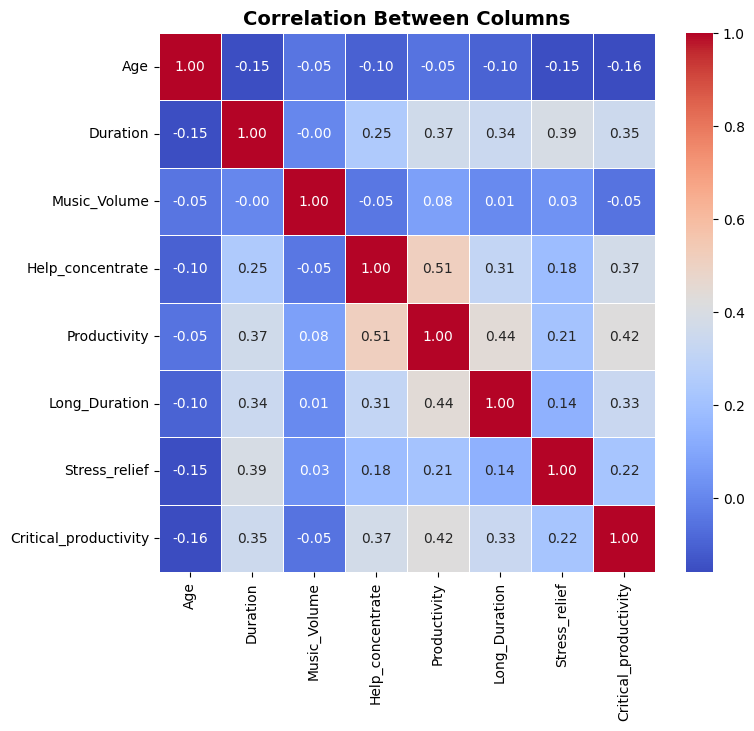

<Figure size 640x480 with 0 Axes>

In [56]:
# Plot heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Columns", weight='bold',fontsize='14')
plt.show()
plt.tight_layout()
plt.show()

HYPOTHESIS TESTING

Chi square -> original categorical data

## 📊 Chi-Square Test (χ²)

The **Chi-Square test** is a **non-parametric statistical test** used to determine whether there is a **significant association between two categorical variables**. It compares the **observed frequencies** in each category with the **expected frequencies** if there were no association.

---

#### ✅ When to Use Chi-Square Test

- When both variables are **categorical**
- To test **independence** between two variables (e.g., Gender vs. Product Preference)
- To check if **observed frequencies** differ from **expected frequencies**

---

#### 🧮 Mathematical Formula

### Chi-Square Statistic

**Chi-Square Formula:**

χ² = Σ ( (Oᵢ - Eᵢ)² / Eᵢ )

Where:  
- **Oᵢ**: Observed Music_Volume in category *i*  
- **Eᵢ**: Expected Music_Volume in category *i*


The sum is taken over all categories or cells in the contingency table.

---

#### ⚙️ How It Works Internally

1. Create a **contingency table** (cross-tabulation of two categorical variables).
2. Calculate the **expected frequencies** assuming the variables are independent.
3. Apply the **Chi-Square formula** to compare observed and expected values.
4. Use degrees of freedom to interpret the **p-value**.

**Degrees of Freedom (df):**

\[
df = (r - 1)(c - 1)
\]

Where:
- \( r \): number of rows  
- \( c \): number of columns

---

#### 🧠 Interpretation

- If the **p-value < significance level** (commonly 0.05), reject the null hypothesis.
- **Null Hypothesis (H₀)**: The two variables are independent.
- **Alternative Hypothesis (H₁)**: There is an association between the variables.

### **1. Is music helpful for focus depending on the kind of work you do?**
Variables: Occupation vs Help_concentrate

Test: Chi-Square

Why: Both are categories

H₀: The type of work does not affect whether music helps with focus.

H₁: The type of work affects whether music helps with focus.



Chi-Square Value: 36.551833403219575
Degrees of Freedom: 16
Critical Value (alpha = 0.05): 26.29622760486423
If the Chi-Square statistic 36.551833403219575 is greater than the critical value 26.29622760486423, we reject the null hypothesis.
Reject H₀: There is a significant association between occupation and whether music helps with concentration.


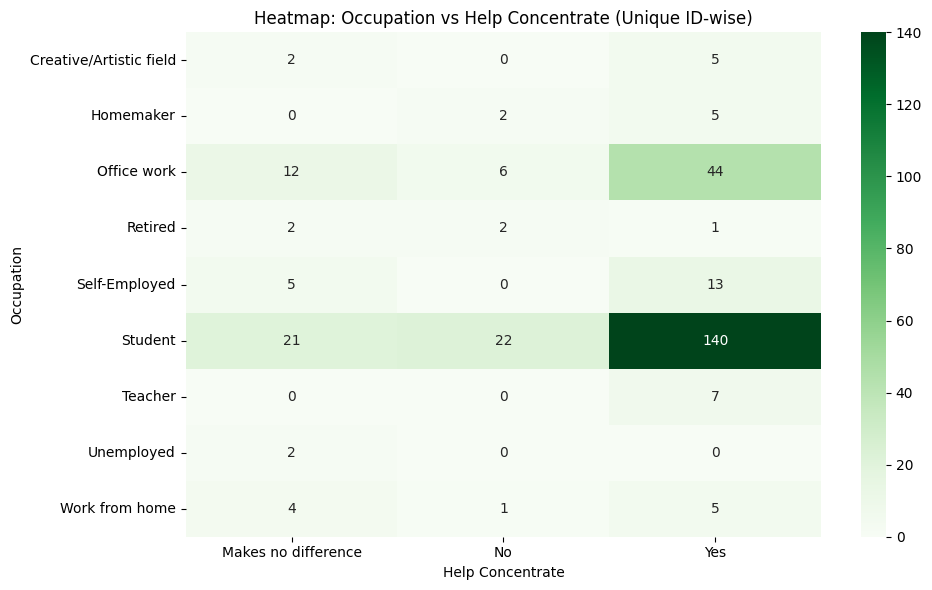

In [57]:
# Step 1: Remove duplicate entries by unique ID
df_unique = df.drop_duplicates(subset='Res_ID')

# Step 2: Create contingency table using unique individuals
table = pd.crosstab(df_unique['Occupation'], df_unique['Help_concentrate'])

# Step 3: Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(table)

# Step 4: Find the critical value for the Chi-Square test at alpha = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Step 5: Print results
print("Chi-Square Value:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Critical Value (alpha = 0.05):", critical_value)

# Step 6: Interpret the result using the critical value
print(f"If the Chi-Square statistic {chi2_stat} is greater than the critical value {critical_value}, we reject the null hypothesis.")
if chi2_stat > critical_value:
    print("Reject H₀: There is a significant association between occupation and whether music helps with concentration.")
else:
    print("Fail to reject H₀: There is no significant link between job type and focus help.")

# Step 7: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Heatmap: Occupation vs Help Concentrate (Unique ID-wise)')
plt.ylabel('Occupation')
plt.xlabel('Help Concentrate')
plt.tight_layout()
plt.show()

### **2. How do activities influence the music genre preferences of individuals?**
Variables: activity_list vs Genre_Preference

Test: Chi-Square

Why: Both are categories

H₀: No link between activity and genre

H₁: There is a link



Chi-Square Value: 21.51542231177464
Degrees of Freedom: 30
Critical Value (alpha = 0.05): 43.77297182574219
If the Chi-Square statistic 21.51542231177464 is greater than the critical value 43.77297182574219, we reject the null hypothesis.
Fail to reject H₀: There is no significant link between activity and genre preference.


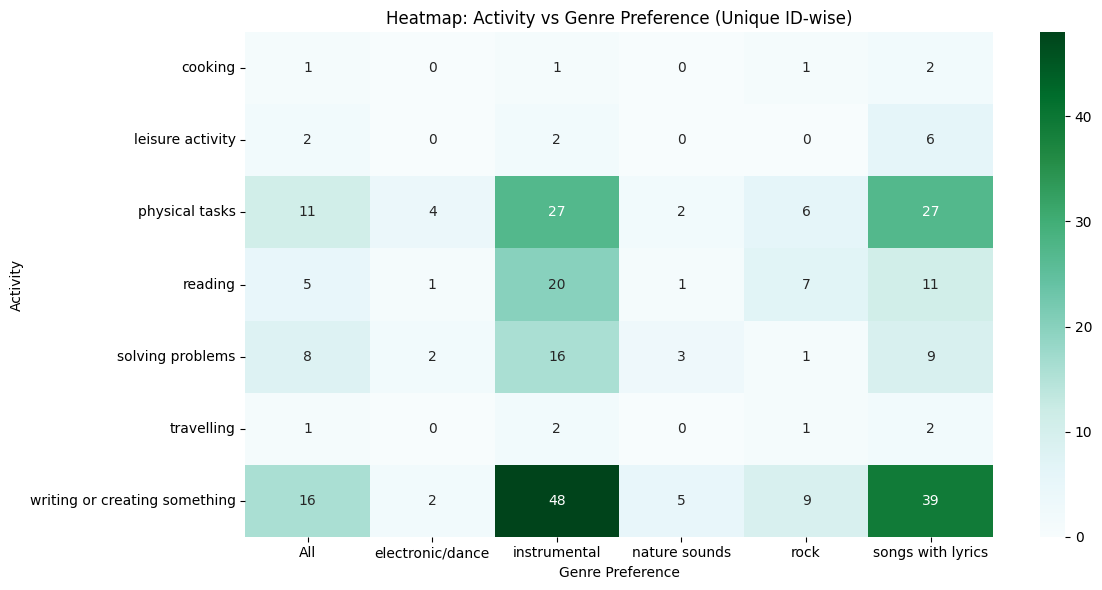

In [58]:
# Step 1: Remove duplicate IDs to ensure unique individuals
df_unique = df.drop_duplicates(subset='Res_ID')

# Step 2: Create contingency table from unique entries
contingency_table = pd.crosstab(df_unique['activity_list'], df_unique['Genre_Preference'])

# Step 3: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Find the critical value for the Chi-Square test at alpha = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Step 5: Display results
print("Chi-Square Value:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Critical Value (alpha = 0.05):", critical_value)

# Step 6: Interpret result using the critical value
print(f"If the Chi-Square statistic {chi2_stat} is greater than the critical value {critical_value}, we reject the null hypothesis.")
if chi2_stat > critical_value:
    print("Reject H₀: There is a significant difference between Activity and Genre preference are associated.")
else:
    print("Fail to reject H₀: There is no significant link between activity and genre preference.")

# Step 7: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='BuGn', cbar=True)
plt.title('Heatmap: Activity vs Genre Preference (Unique ID-wise)')
plt.xlabel('Genre Preference')
plt.ylabel('Activity')
plt.tight_layout()
plt.show()

### **3. How does music used in long session impact a person's productivity?**
Variables: Long_Duration vs Productivity.

Test: chi-square

H₀: No difference in productivity

H₁: There is a difference

Link 1: https://hbr.org/2022/09/can-music-make-you-more-productive

Link 2: https://ugresearchjournals.illinois.edu/index.php/brainmatters/article/view/1006

Link 3: https://statuslabs.com/blog/science-backed-office-playlist-how-music-affects-productivity-and-focus

Chi-Square Value: 55.78705451974952
Degrees of Freedom: 2
Critical Value (alpha = 0.05): 5.991464547107979
If the Chi-Square statistic 55.78705451974952 is greater than the critical value 5.991464547107979, we reject the null hypothesis.
Reject H₀: There is a significant difference between productivity and Long Duration are associated.


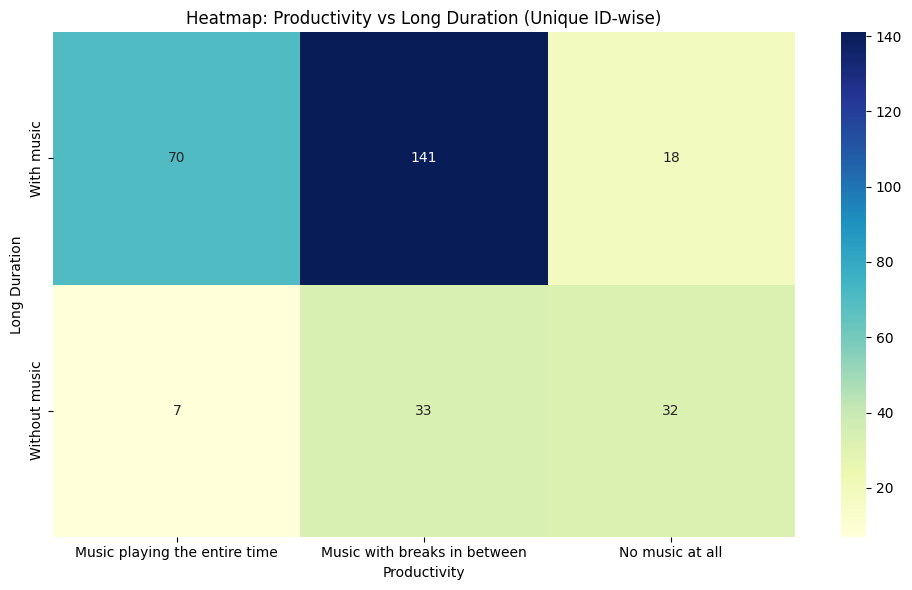

In [59]:
# Step 1: Remove duplicate IDs to ensure unique individuals
df_unique = df.drop_duplicates(subset='Res_ID')

# Step 2: Create contingency table
contingency_table = pd.crosstab(df_unique['Productivity'], df_unique['Long_Duration'])

# Step 3: Perform the Chi-Square Test
# chi2_contingency returns the chi-square value, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Find the critical value for the Chi-Square test at alpha = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Step 5: Display the critical value and the Chi-Square value
print("Chi-Square Value:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Critical Value (alpha = 0.05):", critical_value)

# Step 6: Interpret the result using the critical value
print(f"If the Chi-Square statistic {chi2_stat} is greater than the critical value {critical_value}, we reject the null hypothesis.")
if chi2_stat > critical_value:
    print("Reject H₀: There is a significant difference between productivity and Long Duration are associated.")
else:
    print("Fail to reject H₀: There is no significant link between Productivity and genre preference.")

# Step 7: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Productivity vs Long Duration (Unique ID-wise)')
plt.xlabel('Productivity')
plt.ylabel('Long Duration')
plt.tight_layout()
plt.show()

### **4. How does stress reduction through music listening impact an individual's productivity during work-related tasks?**
Variables: Stress_relief vs Critical_productivity

Test: chi square

H₀: No difference in productivity

H₁: There is a difference

Link 1: https://www.cbsnews.com/minnesota/news/music-can-relieve-stress-increase-productivity-study-finds/

Link 2: https://psychcentral.com/stress/the-power-of-music-to-reduce-stress

Link 3: https://statuslabs.com/blog/science-backed-office-playlist-how-music-affects-productivity-and-focus

Link 4: https://www.thesukha.co/post/the-science-behind-music-and-stress-relief-why-it-works



Chi-Square Value: 22.411779258192283
Degrees of Freedom: 6
Critical Value (alpha = 0.05): 12.591587243743977
If the Chi-Square statistic 22.411779258192283 is greater than the critical value 12.591587243743977, we reject the null hypothesis.
Reject H₀: There is a significant difference between Stress_relief and Critical_productivity are associated.


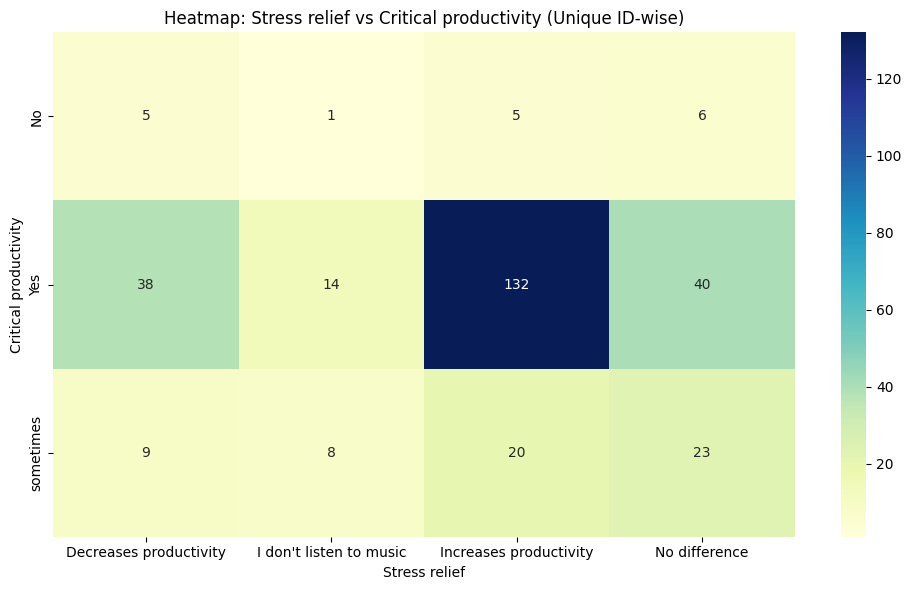

In [60]:
# Step 1: Remove duplicate IDs to ensure unique individuals
df_unique = df.drop_duplicates(subset='Res_ID')

# Step 2: Create contingency table
contingency_table = pd.crosstab(df_unique['Stress_relief'], df_unique['Critical_productivity'])

# Step 3: Perform the Chi-Square Test
# chi2_contingency returns the chi-square value, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Find the critical value for the Chi-Square test at alpha = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Step 5: Display the critical value and the Chi-Square value
print("Chi-Square Value:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Critical Value (alpha = 0.05):", critical_value)

# Step 6: Interpret the result using the critical value
print(f"If the Chi-Square statistic {chi2_stat} is greater than the critical value {critical_value}, we reject the null hypothesis.")
if chi2_stat > critical_value:
    print("Reject H₀: There is a significant difference between Stress_relief and Critical_productivity are associated.")
else:
    print("Fail to reject H₀: There is no significant link between Stress relief and Critical productivity.")

# Step 7: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Stress relief vs Critical productivity (Unique ID-wise)')
plt.xlabel('Stress relief')
plt.ylabel('Critical productivity')
plt.tight_layout()
plt.show()


### **5. Do people who believe music helps them focus tend to listen to it more frequently?**
Variables: Help_concentrate vs duration

Test: cgi-square

H₀: No difference in Music_Volume

H₁: There is a difference



Chi-Square Value: 25.380091538154
Degrees of Freedom: 6
Critical Value (alpha = 0.05): 12.591587243743977
If the Chi-Square statistic 25.380091538154 is greater than the critical value 12.591587243743977, we reject the null hypothesis.
Reject H₀: There is a significant difference between Stress_relief and Critical_productivity are associated.


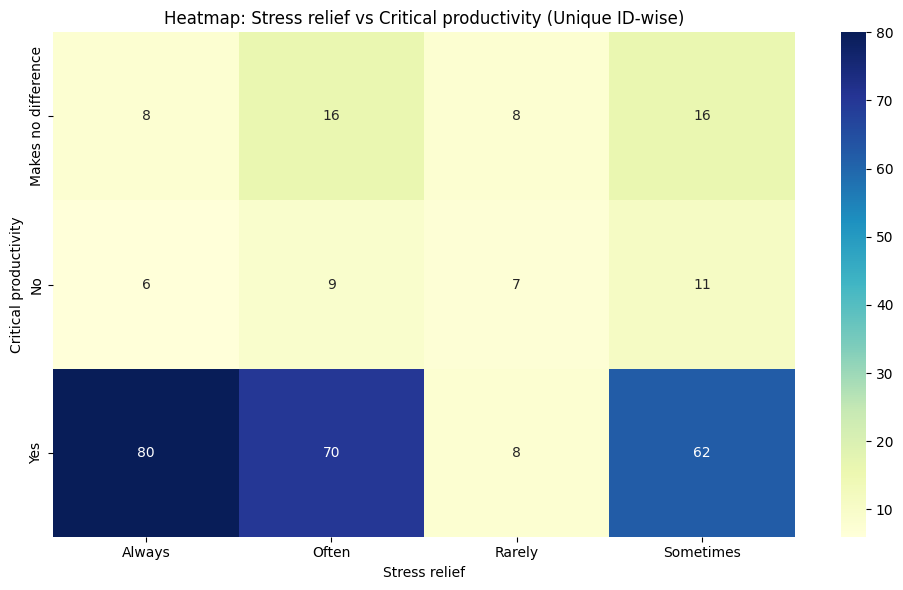

In [61]:
# Step 1: Remove duplicate IDs to ensure unique individuals
df_unique = df.drop_duplicates(subset='Res_ID')

# Step 2: Create contingency table
contingency_table = pd.crosstab(df_unique['Help_concentrate'], df_unique['Duration'])

# Step 3: Perform the Chi-Square Test
# chi2_contingency returns the chi-square value, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Find the critical value for the Chi-Square test at alpha = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Step 5: Display the critical value and the Chi-Square value
print("Chi-Square Value:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Critical Value (alpha = 0.05):", critical_value)

# Step 6: Interpret the result using the critical value
print(f"If the Chi-Square statistic {chi2_stat} is greater than the critical value {critical_value}, we reject the null hypothesis.")
if chi2_stat > critical_value:
    print("Reject H₀: There is a significant difference between Stress_relief and Critical_productivity are associated.")
else:
    print("Fail to reject H₀: There is No significant link between Stress relief and Critical productivity.")

# Step 7: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Stress relief vs Critical productivity (Unique ID-wise)')
plt.xlabel('Stress relief')
plt.ylabel('Critical productivity')
plt.tight_layout()
plt.show()


In [62]:
def chi_square_analysis(df, col_x, col_y, title, cmap='YlGnBu'):
    # Step 1: Remove duplicates
    df_unique = df.drop_duplicates(subset='Res_ID')

    # Step 2: Create contingency table
    contingency_table = pd.crosstab(df_unique[col_x], df_unique[col_y])

    # Step 3: Perform Chi-Square Test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Step 4: Critical value
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, dof)

    # Step 5: Print results
    print(f"--- {title} ---")
    print("Chi-Square Value:", chi2_stat)
    print("Degrees of Freedom:", dof)
    print("Critical Value (alpha = 0.05):", critical_value)

    # Step 6: Interpretation
    if chi2_stat > critical_value:
        print(f"Reject H₀: There is a significant difference between {col_x} and {col_y} are associated.")
    else:
        print(f"Fail to reject H₀: There is No significant link between {col_x} and {col_y}.")
    print("\n")

    # Step 7: Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap=cmap, cbar=True)
    plt.title(f'Heatmap: {title} (Unique ID-wise)')
    plt.xlabel(col_y)
    plt.ylabel(col_x)
    plt.tight_layout()
    plt.show()

--- Occupation vs Help Concentrate ---
Chi-Square Value: 36.551833403219575
Degrees of Freedom: 16
Critical Value (alpha = 0.05): 26.29622760486423
Reject H₀: There is a significant difference between Occupation and Help_concentrate are associated.




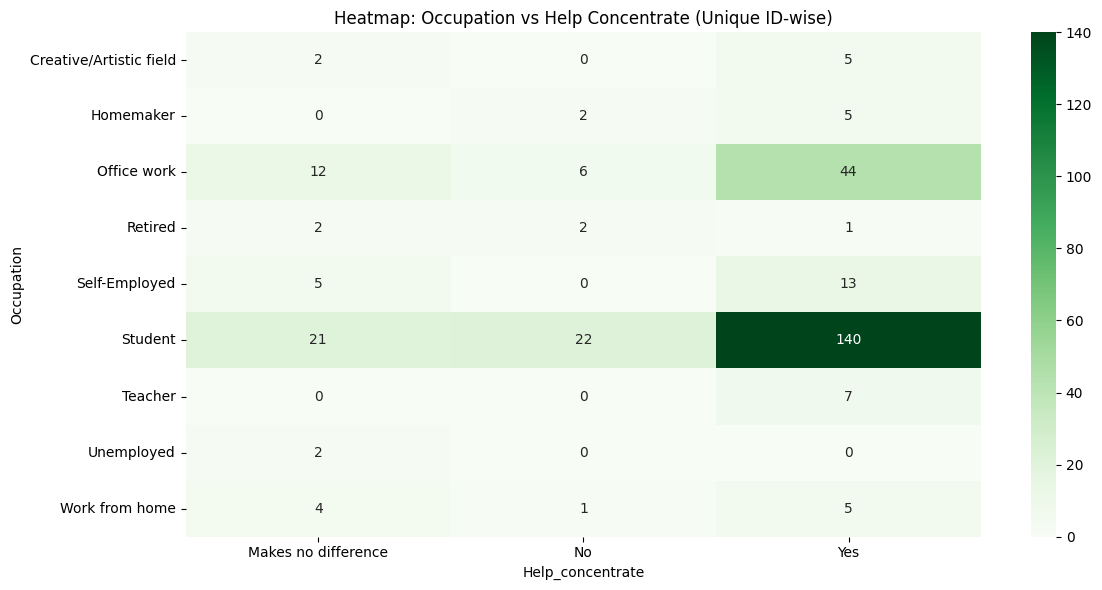

In [63]:
# Example 1
chi_square_analysis(df, 'Occupation', 'Help_concentrate', 'Occupation vs Help Concentrate','Greens')


--- Activity vs Genre Preference ---
Chi-Square Value: 21.51542231177464
Degrees of Freedom: 30
Critical Value (alpha = 0.05): 43.77297182574219
Fail to reject H₀: There is No significant link between activity_list and Genre_Preference.




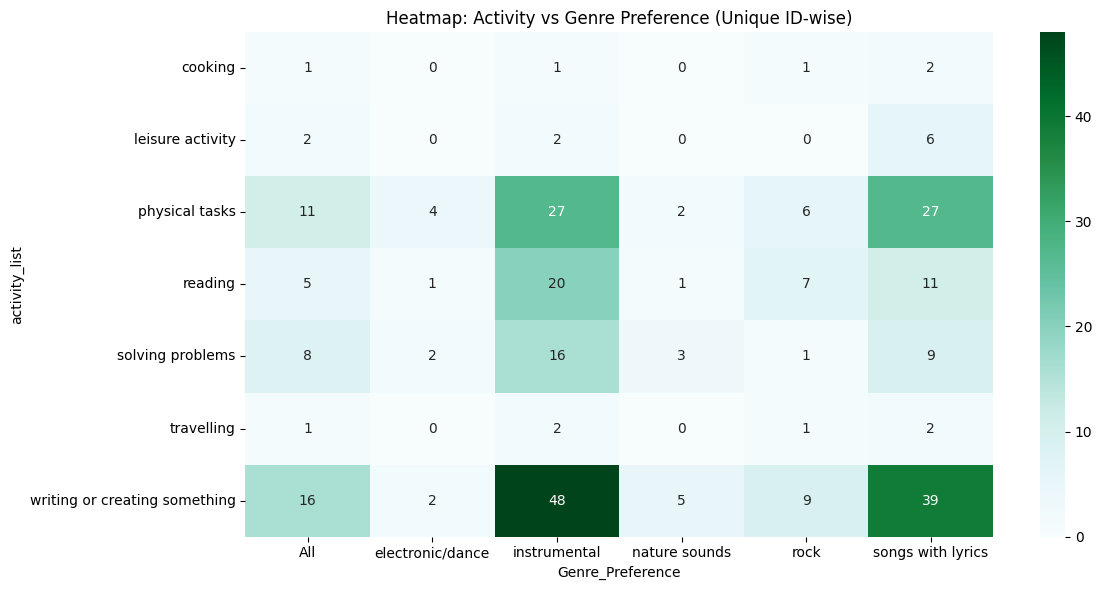

In [64]:
# Example 2
chi_square_analysis(df, 'activity_list', 'Genre_Preference', 'Activity vs Genre Preference','BuGn')

--- Productivity vs Long Duration ---
Chi-Square Value: 55.78705451974952
Degrees of Freedom: 2
Critical Value (alpha = 0.05): 5.991464547107979
Reject H₀: There is a significant difference between Productivity and Long_Duration are associated.




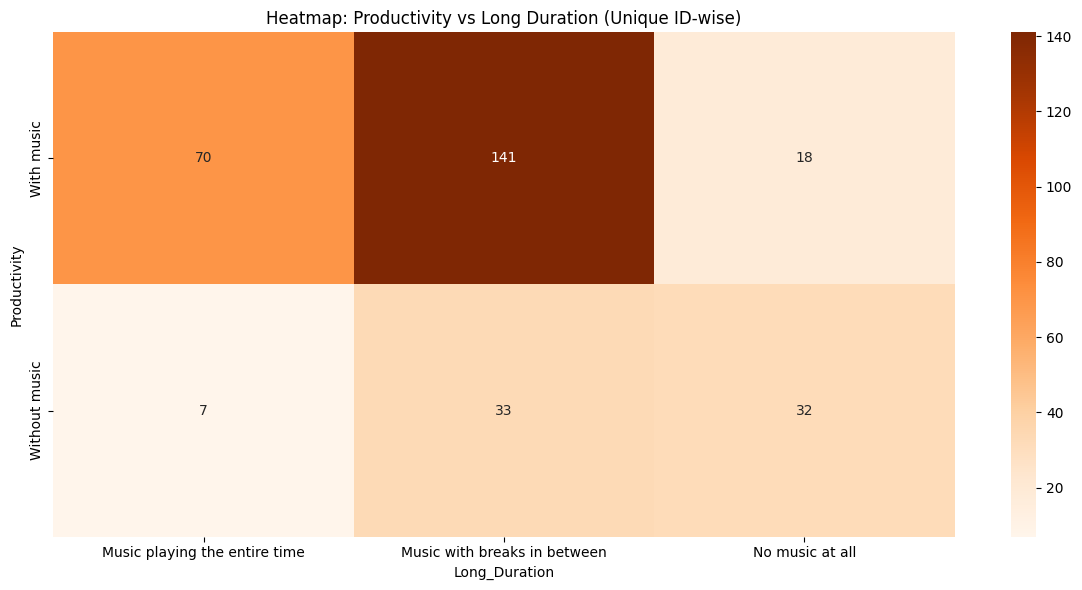

In [65]:
# Example 3
chi_square_analysis(df, 'Productivity', 'Long_Duration', 'Productivity vs Long Duration','Oranges')

--- Stress Relief vs Critical Productivity ---
Chi-Square Value: 22.411779258192283
Degrees of Freedom: 6
Critical Value (alpha = 0.05): 12.591587243743977
Reject H₀: There is a significant difference between Stress_relief and Critical_productivity are associated.




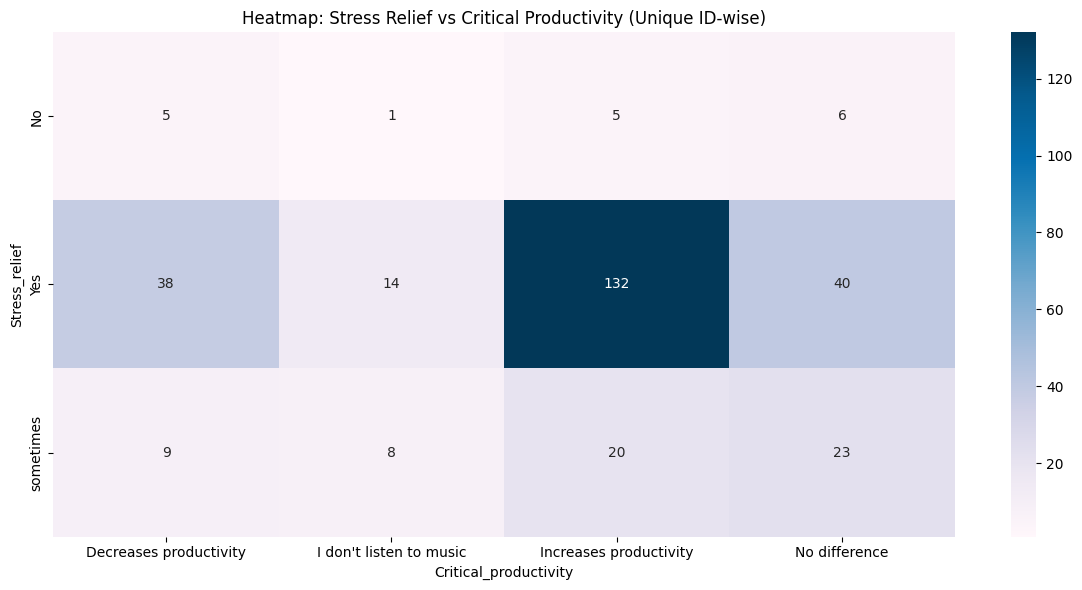

In [66]:

# Example 4
chi_square_analysis(df, 'Stress_relief', 'Critical_productivity', 'Stress Relief vs Critical Productivity','PuBu')

--- Help Concentrate vs Duration ---
Chi-Square Value: 25.380091538154
Degrees of Freedom: 6
Critical Value (alpha = 0.05): 12.591587243743977
Reject H₀: There is a significant difference between Help_concentrate and Duration are associated.




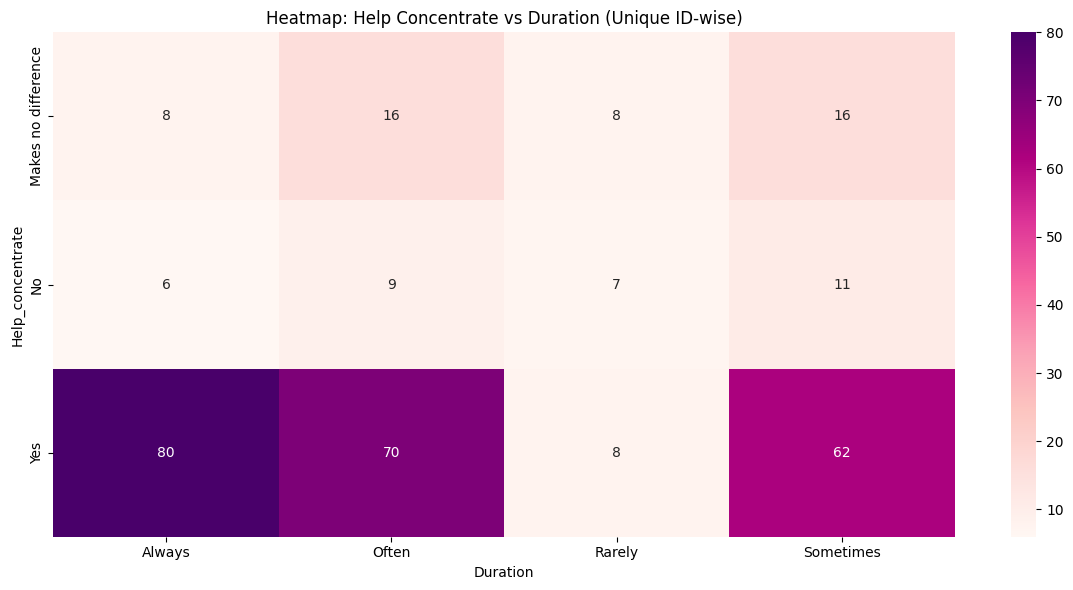

In [67]:
# Example 5
chi_square_analysis(df, 'Help_concentrate', 'Duration', 'Help Concentrate vs Duration','RdPu')